Scanpy data loading tutorial from
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

# 1. Load the data into an AnnData Object

In [2]:
# Set read/write directories
input_folder = 'data/filtered_gene_bc_matrices/hg19/'
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [3]:
# Create AnnData object from cahced file
adata=sc.read_h5ad(results_file)
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

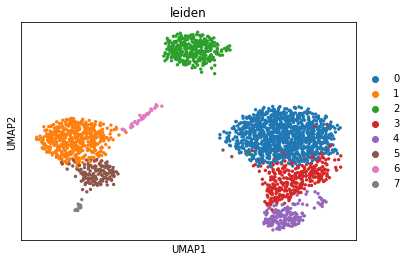

ranking genes
    finished (0:00:02)


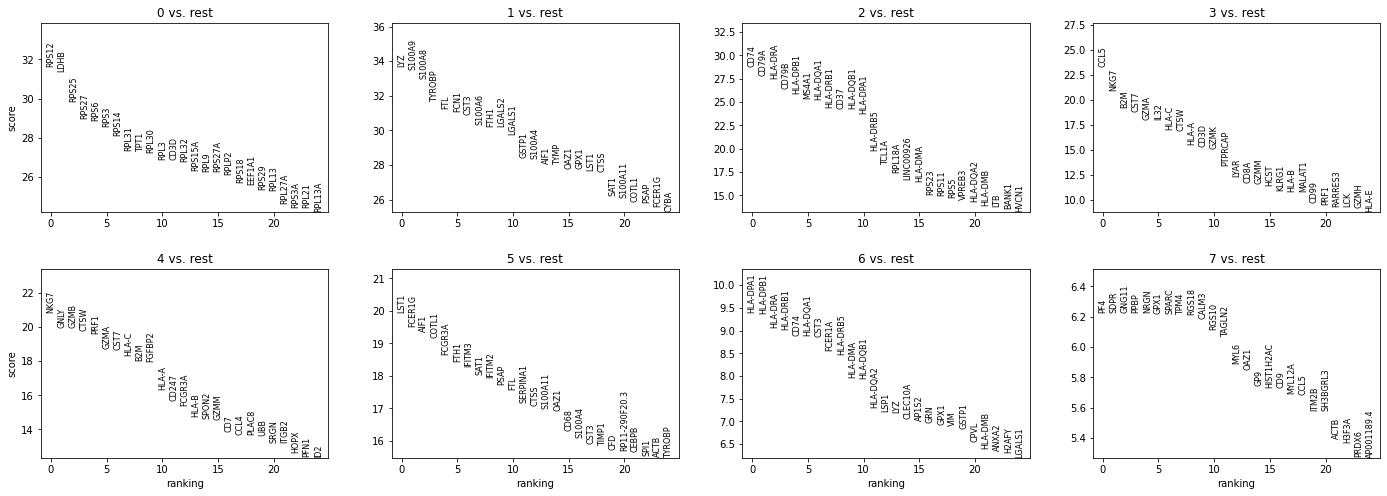

{'params': {'groupby': 'leiden',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('RPS12', 'LYZ', 'CD74', 'CCL5', 'NKG7', 'LST1', 'HLA-DPA1', 'PF4'),
            ('LDHB', 'S100A9', 'CD79A', 'NKG7', 'GNLY', 'FCER1G', 'HLA-DPB1', 'SDPR'),
            ('RPS25', 'S100A8', 'HLA-DRA', 'B2M', 'GZMB', 'AIF1', 'HLA-DRA', 'GNG11'),
            ...,
            ('HLA-DRA', 'RPS27', 'S100A6', 'FTH1', 'RPL28', 'RPL13A', 'RPL21', 'RPL11'),
            ('CYBA', 'RPS27A', 'TMSB4X', 'RPS11', 'RPL18A', 'RPL3', 'RPS27', 'MALAT1'),
            ('CD74', 'MALAT1', 'S100A4', 'TMSB10', 'RPL32', 'RPL13', 'MALAT1', 'RPL10')],
           dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O')]),
 'scores': rec.array([( 31.638857,  33.69175 ,  28.787863,  23.349062,  20.861284,  19.956274,  9.400656 ,  6.228046 ),
            ( 31.389578,  33.50122 ,  27.783524,  20.948235,

In [18]:
# Find marker genes per cluster using t-test, wilcoxon or logistic regression
# the output is stored in adata.uns.rank_genes_groups

sc.pl.umap(adata,color=['leiden'])

# T-test

# sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

#Wilcoxon
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

# Logistic regression
# sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

adata.write(results_file)
adata.uns['rank_genes_groups']

In [31]:
#Record markers for future use

marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [20]:
adata = sc.read(results_file)

In [21]:
# Show markers per cluster in a dataframe

pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7
0,RPS12,LYZ,CD74,CCL5,NKG7,LST1,HLA-DPA1,PF4
1,LDHB,S100A9,CD79A,NKG7,GNLY,FCER1G,HLA-DPB1,SDPR
2,RPS25,S100A8,HLA-DRA,B2M,GZMB,AIF1,HLA-DRA,GNG11
3,RPS27,TYROBP,CD79B,CST7,CTSW,COTL1,HLA-DRB1,PPBP
4,RPS6,FTL,HLA-DPB1,GZMA,PRF1,FCGR3A,CD74,NRGN


In [22]:
# Present markers and asscoiated scores

result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p
0,RPS12,1.079322e-219,LYZ,7.634876e-249,CD74,3.043536e-182,CCL5,1.408736e-120,NKG7,1.203971e-96,LST1,1.322111e-88,HLA-DPA1,5.422417e-21,PF4,4.722886e-10
1,LDHB,2.807446e-216,S100A9,4.626358e-246,CD79A,6.860832e-170,NKG7,1.947176e-97,GNLY,1.257170e-88,FCER1G,6.259712e-85,HLA-DPB1,7.591860e-21,SDPR,4.733899e-10
2,RPS25,8.782142e-196,S100A8,1.622835e-238,HLA-DRA,8.398068e-166,B2M,1.645740e-82,GZMB,1.429027e-88,AIF1,1.348814e-83,HLA-DRA,1.306768e-19,GNG11,4.733899e-10
3,RPS27,8.804024e-185,TYROBP,2.957652e-220,CD79B,1.171444e-153,CST7,6.188112e-79,CTSW,4.144726e-87,COTL1,5.974694e-82,HLA-DRB1,1.865104e-19,PPBP,4.744938e-10
4,RPS6,2.266808e-183,FTL,2.479195e-214,HLA-DPB1,6.167786e-148,GZMA,1.004637e-72,PRF1,1.692100e-85,FCGR3A,1.392377e-77,CD74,5.853161e-19,NRGN,4.800511e-10


ranking genes
    finished (0:00:01)


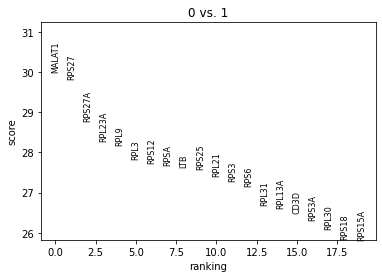

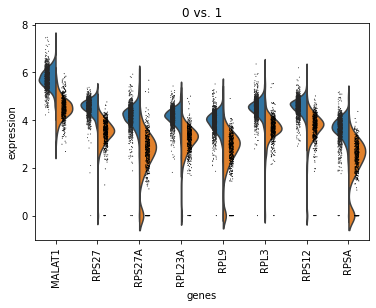

In [24]:
# Compare to a single cluster

sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

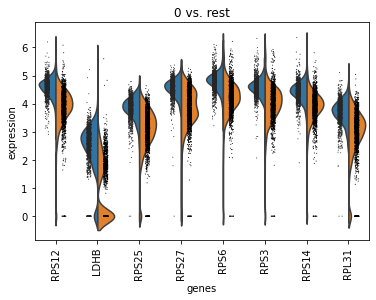

In [26]:
# Reload with differential expression

adata = sc.read(results_file)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

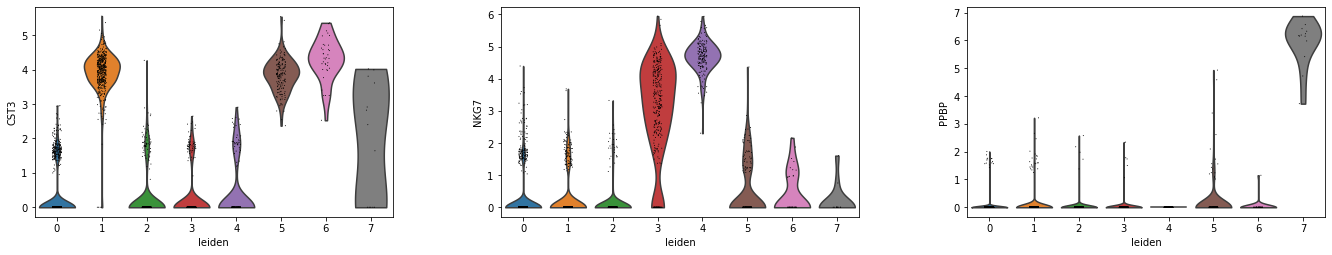

In [27]:
# Compare a specific gene across the clusters

sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

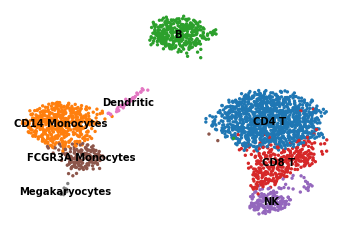

In [29]:
# Rename the clusters

new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

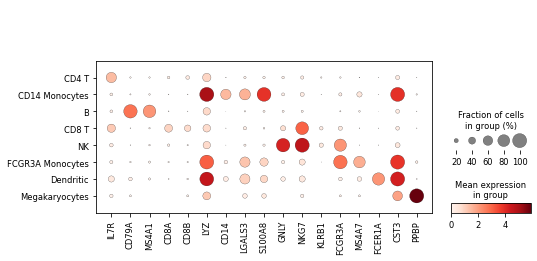

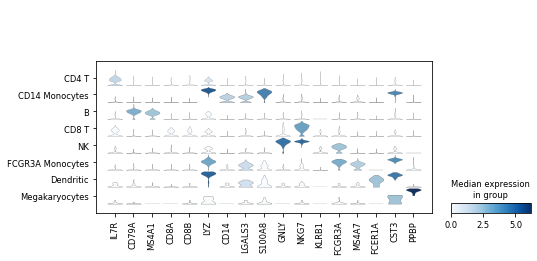

In [33]:
# Visualise markers
sc.pl.dotplot(adata, marker_genes, groupby='leiden')
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90)

In [35]:
adata
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading